# Base Load

## Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## Plot setting

In [2]:
plt.style.use("ggplot")
plt.rcParams['font.family'] = 'Noto Sans CJK TC'
plt.rcParams['axes.unicode_minus']=False

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(font='Noto Sans CJK TC', palette=sns.color_palette(), style="ticks", rc=custom_params)

In [9]:
color = [sns.color_palette("tab10")[1], 
         sns.color_palette("tab10")[9],
         sns.color_palette("tab10")[2],
         sns.color_palette("tab10")[0]]

## Data integration
之後不用跑了，可以跳過

### Load data for weather

In [116]:
weather_data = pd.read_pickle("./data/stop_weather_data_all.pkl")
# 修正
weather_data[['year', 'month']] = weather_data[['year', 'month']].astype("str")
weather_data['month'] = weather_data['month'].replace({"1":'01', "2":'02', "3":'03', "4":'04', "5":'05', 
                                                       "6":'06', "7":'07', "8":'08', "9":'09'})

In [117]:
weather_data.head(3)

,year,month,day,StationName,Address,觀測站點,temp,RH,WS,Precp
0,2020,11,1,都會公園-文賢路站,奇美博物館文賢路停車場,仁德,25.2,77.0,1.4,0.0
1,2020,11,2,都會公園-文賢路站,奇美博物館文賢路停車場,仁德,25.4,80.0,2.0,0.0
2,2020,11,3,都會公園-文賢路站,奇美博物館文賢路停車場,仁德,24.6,69.0,2.8,0.0


### Load data for T-bike

In [6]:
data = pd.read_excel("C:/Users/Rou_yi/OneDrive/上課/統計諮詢/統諮期末報告/data/各站每月使用次數.xlsx")
# 修正
data[['年', '月', '編號']] = data[['年', '月', '編號']].astype("str")
data['月'] = data['月'].replace({"1":'01', "2":'02', "3":'03', "4":'04', "5":'05', 
                                 "6":'06', "7":'07', "8":'08', "9":'09'})
data['total'] = data[['1日', '2日', '3日', '4日', '5日', '6日', '7日', '8日', '9日',
       '10日', '11日', '12日', '13日', '14日', '15日', '16日', '17日', '18日', '19日',
       '20日', '21日', '22日', '23日', '24日', '25日', '26日', '27日', '28日', '29日',
       '30日', '31日']].sum(axis=1)

In [7]:
data.head(3)

,年,月,編號,站場,1日,2日,3日,4日,5日,6日,...,23日,24日,25日,26日,27日,28日,29日,30日,31日,total
0,2021,11,1,保安轉運站,69,53,43,53,65,61,...,55,68,56,69,89,112,91,58,0,2232
1,2021,11,2,十鼓文化村站,14,5,2,2,8,15,...,9,6,7,4,47,10,12,8,0,316
2,2021,11,3,都會公園-文賢路站,9,11,0,6,8,18,...,6,2,8,20,44,24,10,3,0,460


### 合併資料 (合併「使用量」，新增「星期」與「工作日」)

In [119]:
station_ls = list(set(data['站場'].unique()).intersection(set(weather_data['StationName'].unique())))
weather_data_3 = weather_data[weather_data['StationName'].isin(station_ls)]
weather_data_3 = weather_data_3.sort_values(by=['year', 'month', 'StationName', 'day']).reset_index(drop=True)
data_3 = data[data['站場'].isin(station_ls)]
data_3 = data_3.sort_values(by=['年', '月', '站場']).reset_index(drop=True)

In [120]:
len(staton_ls)

75

In [142]:
date = ['1日', '2日', '3日', '4日', '5日', '6日', '7日', '8日', '9日',
       '10日', '11日', '12日', '13日', '14日', '15日', '16日', '17日', '18日', '19日',
       '20日', '21日', '22日', '23日', '24日', '25日', '26日', '27日', '28日', '29日',
       '30日', '31日']

In [175]:
usage = []
for yy, mm, dd, sta in weather_data_3[['year', 'month', 'day', 'StationName']].values:
    dd_col = date[dd-1]
    a = data_3[(data_3['年']==yy)&(data_3['月']==mm)&(data_3['站場']==sta)][dd_col].values.flatten()
    if a.size > 0:
        usage.append([yy, mm, dd, sta, a[0]])
    else:
        usage.append([yy, mm, dd, sta, -1])
        
weather_data_3['usage_num'] = pd.DataFrame(usage)[4]

In [189]:
week_ls = ["五", "六", "日", "一", "二", "三", "四"] # 2019/11/01 是星期五
week = []
for i in range(59400):
    week.append(week_ls[i%7])
    
weather_data_3['week'] = week

In [194]:
holiday = [('2020', '01', 1), ('2020', '01', 23), ('2020', '01', 24), ('2020', '01', 27), ('2020', '01', 28), 
           ('2020', '01', 29), ('2020', '02', 28), ('2020', '04', 2), ('2020', '04', 3), ('2020', '06', 25), 
           ('2020', '06', 26), ('2020', '10', 1), ('2020', '10', 2), ('2020', '10', 9), ('2020', '10', 10), 
           ('2021', '01', 1), ('2021', '02', 10), ('2021', '02', 11) , ('2021', '02', 12), ('2021', '02', 15),
           ('2021', '02', 16), ('2021', '03', 1), ('2021', '04', 2) , ('2021', '04', 5), ('2021', '06', 14), 
           ('2021', '09', 20), ('2021', '09', 21), ('2021', '10', 10) , ('2021', '10', 11), ('2021', '12', 31),
          ]

not_holiday = [('2020', '02', 15), ('2020', '06', 20), ('2020', '09', 26), 
               ('2021', '02', 20), ('2021', '09', 11)
              ]

In [195]:
holiday_or_workday = []
for yy, mm, dd, ww in weather_data_3[['year', 'month', 'day', 'week']].values:
    if (yy, mm, dd) in holiday:
        holiday_or_workday.append('holiday')
    elif (yy, mm, dd) in not_holiday:
        holiday_or_workday.append('workday')
    elif ww in ["六", "日"]:
        holiday_or_workday.append('holiday')
    else:
        holiday_or_workday.append('workday')
        
weather_data_3['workday'] = holiday_or_workday

In [198]:
weather_data_3.head()

,year,month,day,StationName,Address,觀測站點,temp,RH,WS,Precp,usage_num,week,workday
0,2019,11,1,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德,26.7,77.0,1.6,0.0,81,五,workday
1,2019,11,2,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德,26.1,74.0,1.9,0.0,89,六,holiday
2,2019,11,3,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德,26.0,76.0,2.9,0.0,80,日,holiday
3,2019,11,4,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德,24.4,71.0,3.1,0.0,43,一,workday
4,2019,11,5,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德,24.7,67.0,2.5,0.0,71,二,workday


In [201]:
#weather_data_3.to_excel("C:/Users/Rou_yi/OneDrive/上課/統計諮詢/統諮期末報告/data/統整資料.xlsx", index=False)

##  Load whole data

In [3]:
data = pd.read_excel("./data/統整資料.xlsx")

In [4]:
data.head(3)

,year,month,day,StationName,Address,站點區域,觀測站點,temp,RH,WS,Precp,usage_num,week,workday,疫情
0,2019,11,1,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.7,77.0,1.6,0.0,81,五,workday,0.0
1,2019,11,2,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.1,74.0,1.9,0.0,89,六,holiday,0.0
2,2019,11,3,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.0,76.0,2.9,0.0,80,日,holiday,0.0


In [13]:
covid_data = pd.read_excel("./data/嚴重特殊傳染性肺炎-依個案研判日統計.xlsx")
covid_data[['year', 'month', 'day']] = covid_data['個案研判日'].astype(str).str.split('-', expand=True)

In [14]:
covid_data['local'] = [covid_data['確定病例數'][i] if covid_data['是否為境外移入'][i]=='否' else 0 for i in range(covid_data.shape[0])]
covid_data['abroad'] = [covid_data['確定病例數'][i] if covid_data['是否為境外移入'][i]=='是' else 0 for i in range(covid_data.shape[0])]
covid_data['case_in_tainan'] = [covid_data['確定病例數'][i] if covid_data['縣市'][i]=='台南市' else 0 for i in range(covid_data.shape[0])]
covid_data = covid_data.groupby(by=['year', 'month']).sum().reset_index().astype(int)
covid_data = covid_data.append(pd.DataFrame([[2019, 11, 0, 0, 0, 0], [2019, 12, 0, 0, 0, 0]], 
                                            columns=['year', 'month', '確定病例數', 'local', 'abroad', 'case_in_tainan']))

In [15]:
covid_data.head(3)

,year,month,確定病例數,local,abroad,case_in_tainan
0,2020,1,10,2,8,0
1,2020,2,29,19,10,0
2,2020,3,283,25,258,1


In [16]:
covid_data.shape

(27, 6)

# Plot

## 月

In [6]:
data_2 = data[['year', 'month', 'usage_num']].groupby(by=['year', 'month']).sum().reset_index()
data_3 = data[['year', 'month', 'temp', 'RH', 'WS', 'Precp']].groupby(by=['year', 'month']).mean().reset_index()
data_2 = data_2.merge(data_3)

In [7]:
data_2['yymm'] = data_2['year'].astype('str') + '.' + data_2['month'].astype('str')

In [17]:
data_2 = data_2.merge(covid_data)

In [21]:
data_2.columns = ["年", "月", "T-bike使用量", "平均氣溫", "相對溼度", "平均風速", "平均降雨量", "日期", 
                  "確定病例數", "本土病例數", "境外移入病例數", "台南確診病例數"]

In [22]:
data_2.head(3)

,年,月,T-bike使用量,平均氣溫,相對溼度,平均風速,平均降雨量,日期,確定病例數,本土病例數,境外移入病例數,台南確診病例數
0,2019,11,69297,23.370356,69.110222,2.212667,0.000000,2019.11,0,0,0,0
1,2019,12,66353,19.736731,79.678280,2.539226,2.258495,2019.12,0,0,0,0
2,2020,1,68066,18.855441,80.437419,2.417419,0.697204,2020.1,10,2,8,0


In [23]:
color = [sns.color_palette("tab10")[1], 
         sns.color_palette("tab10")[9],
         sns.color_palette("tab10")[2],
         sns.color_palette("tab10")[0]]

Text(0.5, 0, '')

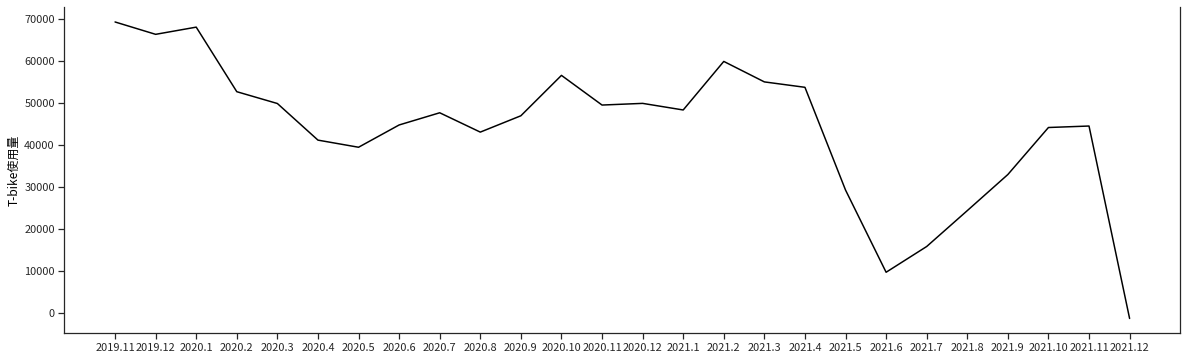

In [28]:
custom_params = {"axes.spines.top": False}
sns.set_theme(font='Noto Sans CJK TC', palette=sns.color_palette(), style="ticks", rc=custom_params)

plt.figure(figsize=(20, 6))
color_1 = 'black'
sns.lineplot(data=data_2, x='日期', y='T-bike使用量', color=color_1, sort=False)
plt.ylabel('T-bike使用量', color = color_1) 
plt.xlabel('') 

In [52]:
data_2['疫情'] = data.groupby(by=['year', 'month']).mean().reset_index()['疫情']

In [53]:
data_2.head(3)

,年,月,T-bike使用量,平均氣溫,相對溼度,平均風速,平均降雨量,日期,確定病例數,本土病例數,境外移入病例數,台南確診病例數,疫情
0,2019,11,69297,23.370356,69.110222,2.212667,0.000000,2019.11,0,0,0,0,0.000000
1,2019,12,66353,19.736731,79.678280,2.539226,2.258495,2019.12,0,0,0,0,0.000000
2,2020,1,68066,18.855441,80.437419,2.417419,0.697204,2020.1,10,2,8,0,0.064516


<AxesSubplot:xlabel='日期', ylabel='疫情指數'>

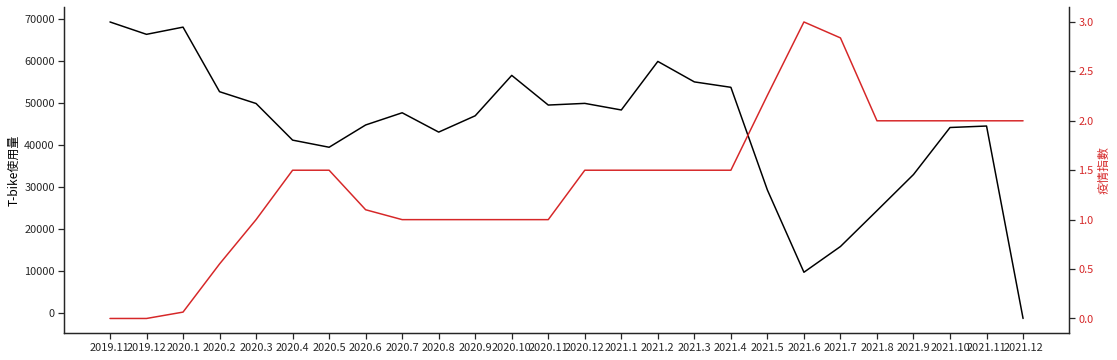

In [60]:
custom_params = {"axes.spines.top": False}
sns.set_theme(font='Noto Sans CJK TC', palette=sns.color_palette(), style="ticks", rc=custom_params)

plt.figure(figsize=(18, 6))
color_1 = 'black'
ax1 = sns.lineplot(data=data_2, x='日期', y='T-bike使用量', color=color_1, sort=False)
plt.ylabel('T-bike使用量', color = color_1) 
plt.xlabel('') 
ax2 = ax1.twinx() 
ax2.set_ylabel('疫情指數', color = sns.color_palette("tab10")[3]) 
ax2.tick_params(axis ='y', labelcolor = sns.color_palette("tab10")[3]) 
sns.lineplot(data=data_2, x='日期', y='疫情', color=sns.color_palette("tab10")[3], sort=False)


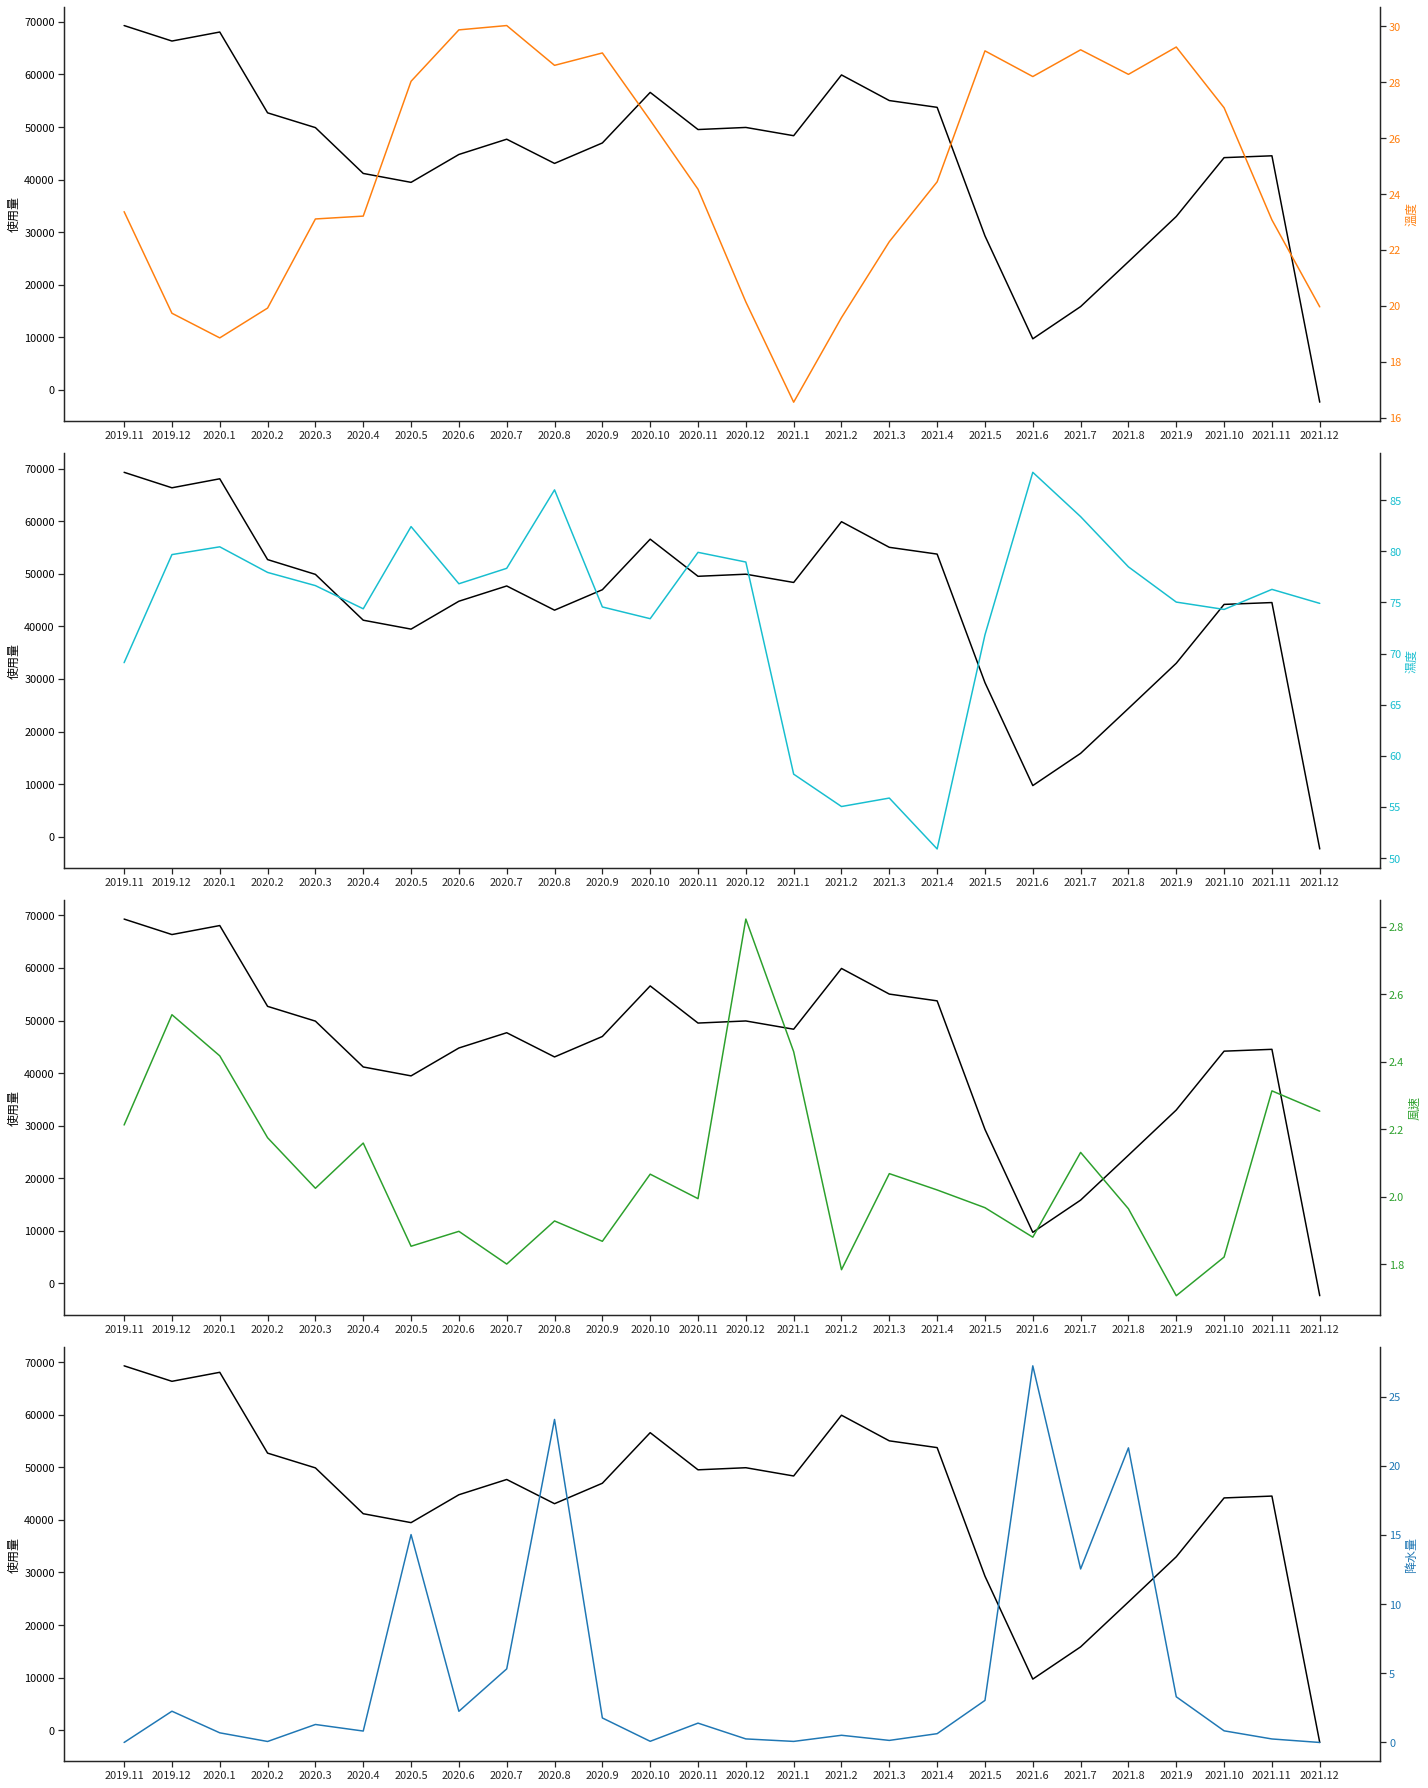

In [43]:
custom_params = {"axes.spines.top": False}
sns.set_theme(font='Noto Sans CJK TC', palette=sns.color_palette(), style="ticks", rc=custom_params)

name = ['溫度', '濕度', '風速', '降水量']

fig, axes = plt.subplots(4, 1, figsize=(20, 25))
for i, item in enumerate(["平均氣溫", "相對溼度", "平均風速", "平均降雨量"]):
    ax1 = axes[i]
    color_1 = 'black'
    sns.lineplot(data=data_2, x='日期', y='使用量', color=color_1, ax=ax1, sort=False)
    ax1.set_ylabel('使用量', color = color_1) 
    ax1.set_xlabel('') 
    ax1.tick_params(axis ='y', labelcolor = color_1) 

    ax2 = ax1.twinx() 
    ax2.set_ylabel(name[i], color = color[i]) 
    ax2.tick_params(axis ='y', labelcolor = color[i]) 
    sns.lineplot(data=data_2, x='日期', y=item, color=color[i], ax=ax2, sort=False)
    
    fig.tight_layout()

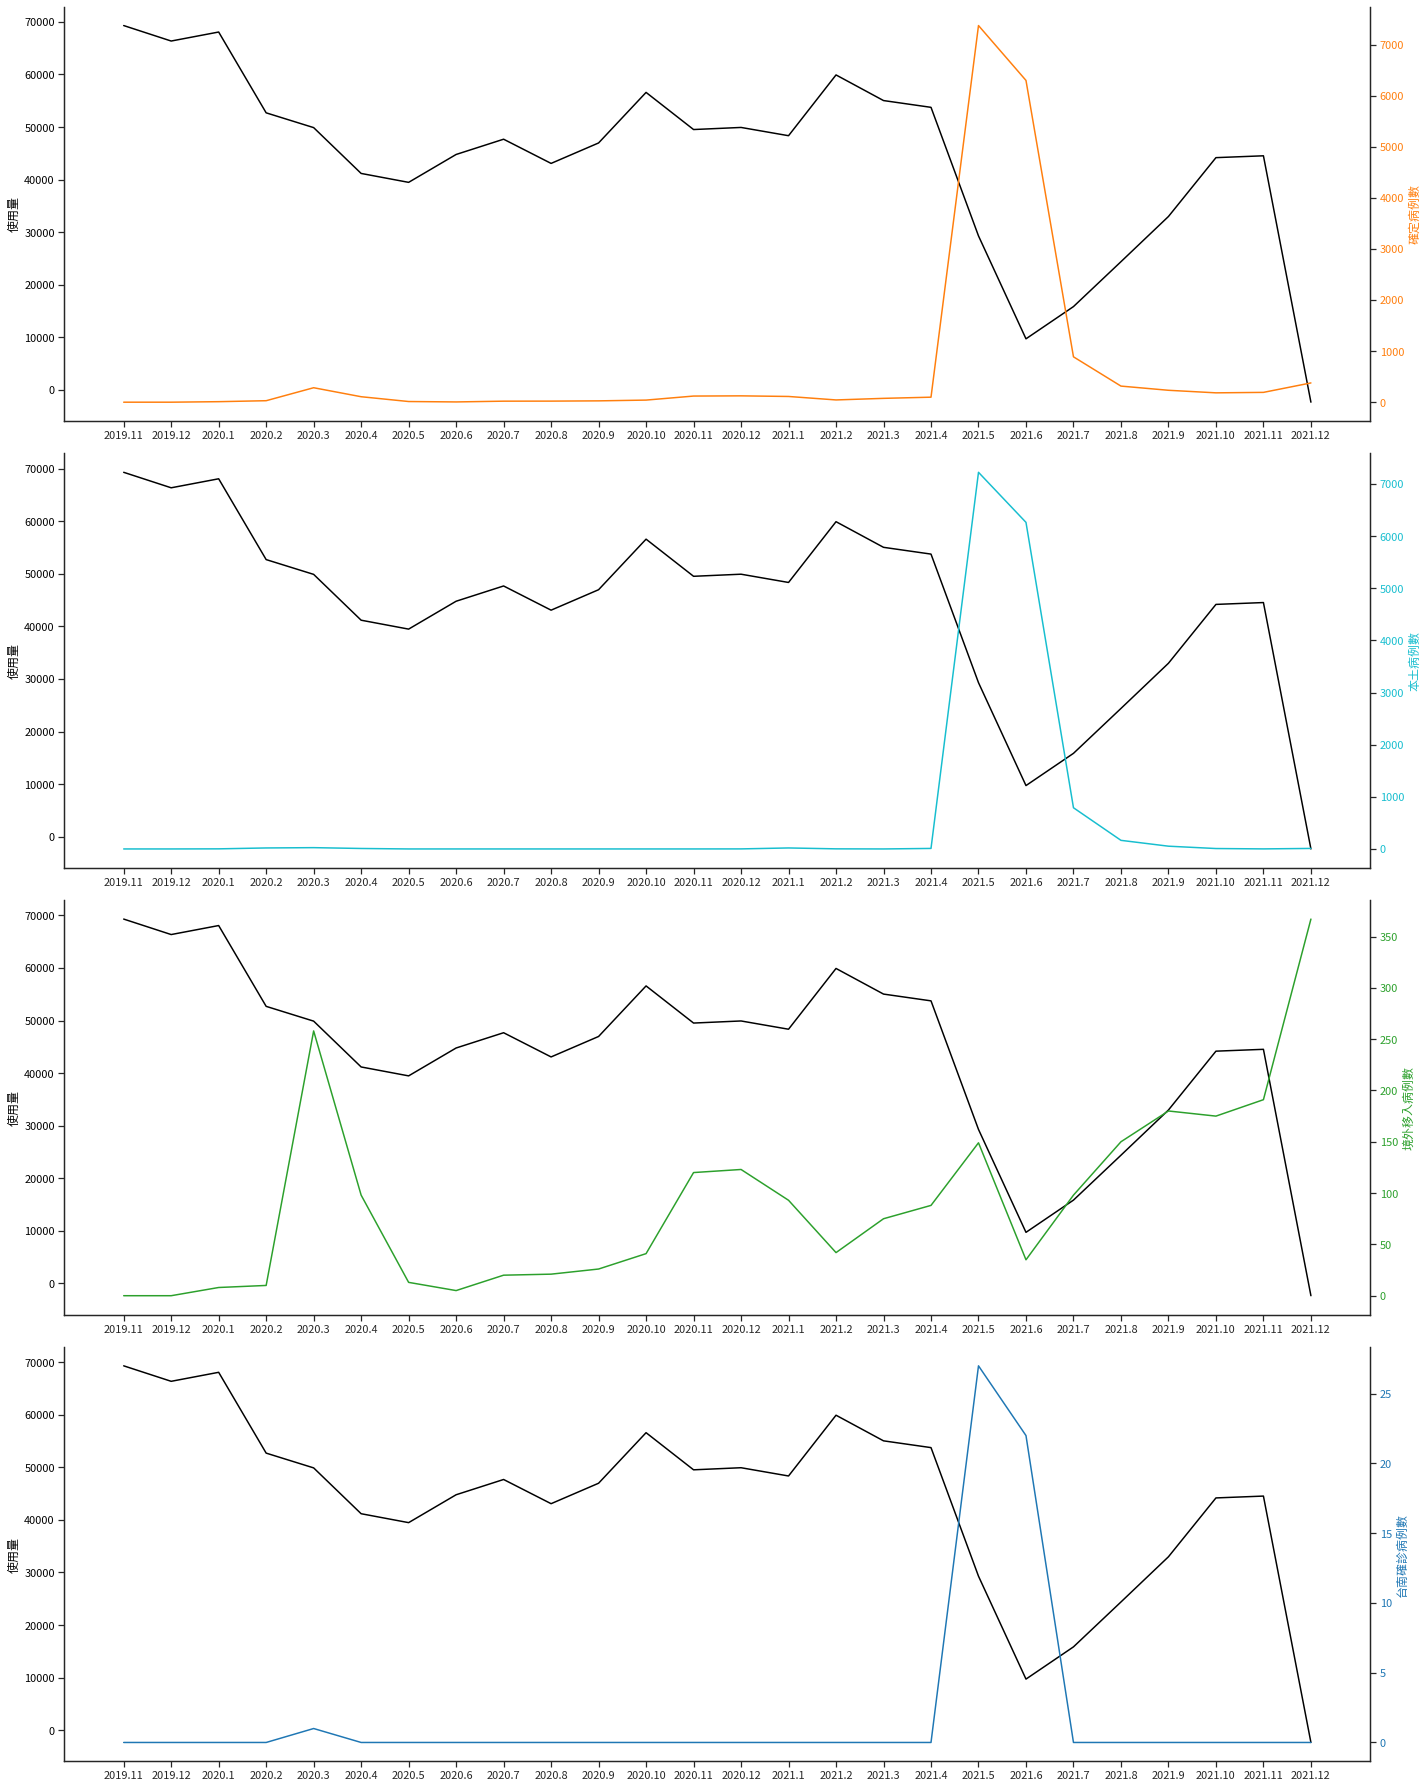

In [125]:
custom_params = {"axes.spines.top": False}
sns.set_theme(font='Noto Sans CJK TC', palette=sns.color_palette(), style="ticks", rc=custom_params)

name = ["確定病例數", "本土病例數", "境外移入病例數", "台南確診病例數"]

fig, axes = plt.subplots(4, 1, figsize=(20, 25))
for i, item in enumerate(["確定病例數", "本土病例數", "境外移入病例數", "台南確診病例數"]):
    ax1 = axes[i]
    color_1 = 'black'
    sns.lineplot(data=data_2, x='日期', y='T-bike使用量', color=color_1, ax=ax1, sort=False)
    ax1.set_ylabel('使用量', color = color_1) 
    ax1.set_xlabel('') 
    ax1.tick_params(axis ='y', labelcolor = color_1) 

    ax2 = ax1.twinx() 
    ax2.set_ylabel(name[i], color = color[i]) 
    ax2.tick_params(axis ='y', labelcolor = color[i]) 
    sns.lineplot(data=data_2, x='日期', y=item, color=color[i], ax=ax2, sort=False)
    
    fig.tight_layout()

## 日

In [111]:
data_2 = data[['year', 'month', 'day', 'usage_num']].groupby(by=['year', 'month', 'day']).sum().reset_index()
data_3 = data[['year', 'month', 'day', 'temp', 'RH', 'WS', 'Precp']].groupby(by=['year', 'month', 'day']).mean().reset_index()
data_2 = data_2.merge(data_3)
data_2['yymmdd'] = data_2['year'].astype('str') + '.' + data_2['month'].astype('str') + '.' + data_2['day'].astype('str')

In [112]:
data_2.head()

,year,month,day,usage_num,temp,RH,WS,Precp,yymmdd
0,2019,11,1,2456,26.340000,78.586667,1.718667,0.0,2019.11.1
1,2019,11,2,2744,25.862667,77.573333,2.040000,0.0,2019.11.2
2,2019,11,3,2748,25.653333,79.053333,2.873333,0.0,2019.11.3
3,2019,11,4,1829,24.165333,69.986667,3.274667,0.0,2019.11.4
4,2019,11,5,1804,24.420000,66.493333,2.522667,0.0,2019.11.5


<AxesSubplot:>

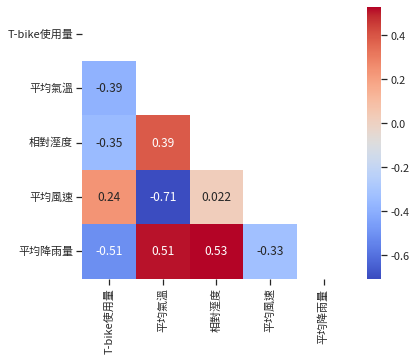

In [30]:
plt.figure(figsize=(6, 5))
corr_matrix = data_2[["T-bike使用量", "平均氣溫", "相對溼度", "平均風速", "平均降雨量"]].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot = True, fmt='.2g', cmap="coolwarm", mask=mask)

<AxesSubplot:>

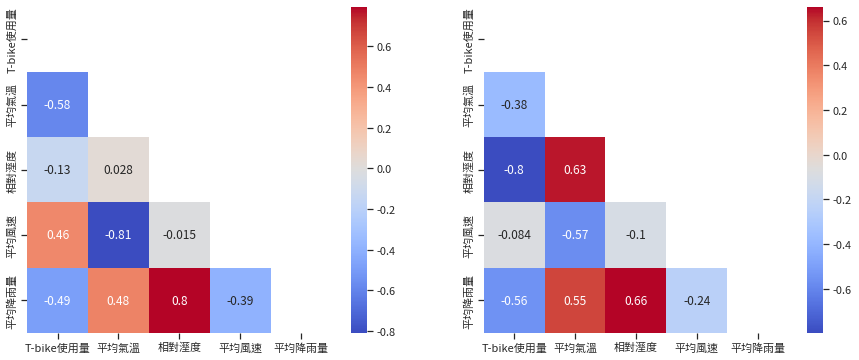

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
corr_matrix = data_2[data_2["年"]==2020][["T-bike使用量", "平均氣溫", "相對溼度", "平均風速", "平均降雨量"]].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot = True, fmt='.2g', cmap="coolwarm", mask=mask, ax=axes[0])

corr_matrix = data_2[data_2["年"]==2021][["T-bike使用量", "平均氣溫", "相對溼度", "平均風速", "平均降雨量"]].corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot = True, fmt='.2g', cmap="coolwarm", mask=mask, ax=axes[1])

<AxesSubplot:>

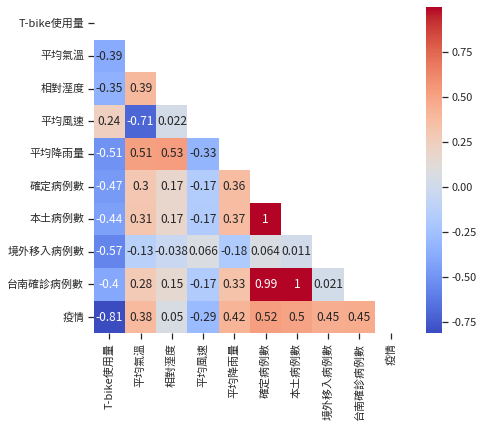

In [61]:
plt.figure(figsize=(7, 6))
corr_matrix = data_2.drop(columns=["年", "月", "日期"]).corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot = True, fmt='.2g', cmap="coolwarm", mask=mask)

<AxesSubplot:>

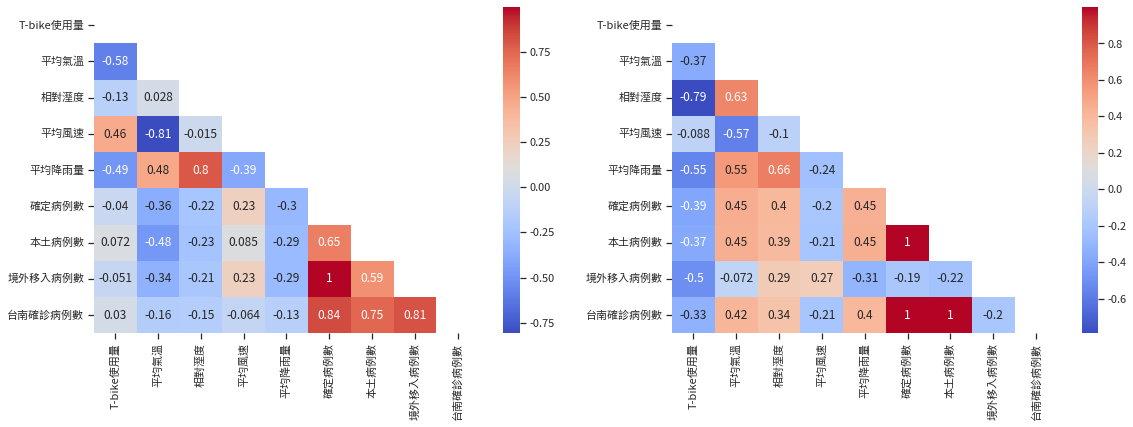

In [110]:
fig, axes = plt.subplots(1, 2, figsize=(19, 6))
corr_matrix = data_2[data_2["年"]==2020].drop(columns=["年", "月", "日期"]).corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot = True, fmt='.2g', cmap="coolwarm", mask=mask, ax=axes[0])

corr_matrix = data_2[data_2["年"]==2021].drop(columns=["年", "月", "日期"]).corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_matrix, annot = True, fmt='.2g', cmap="coolwarm", mask=mask, ax=axes[1])

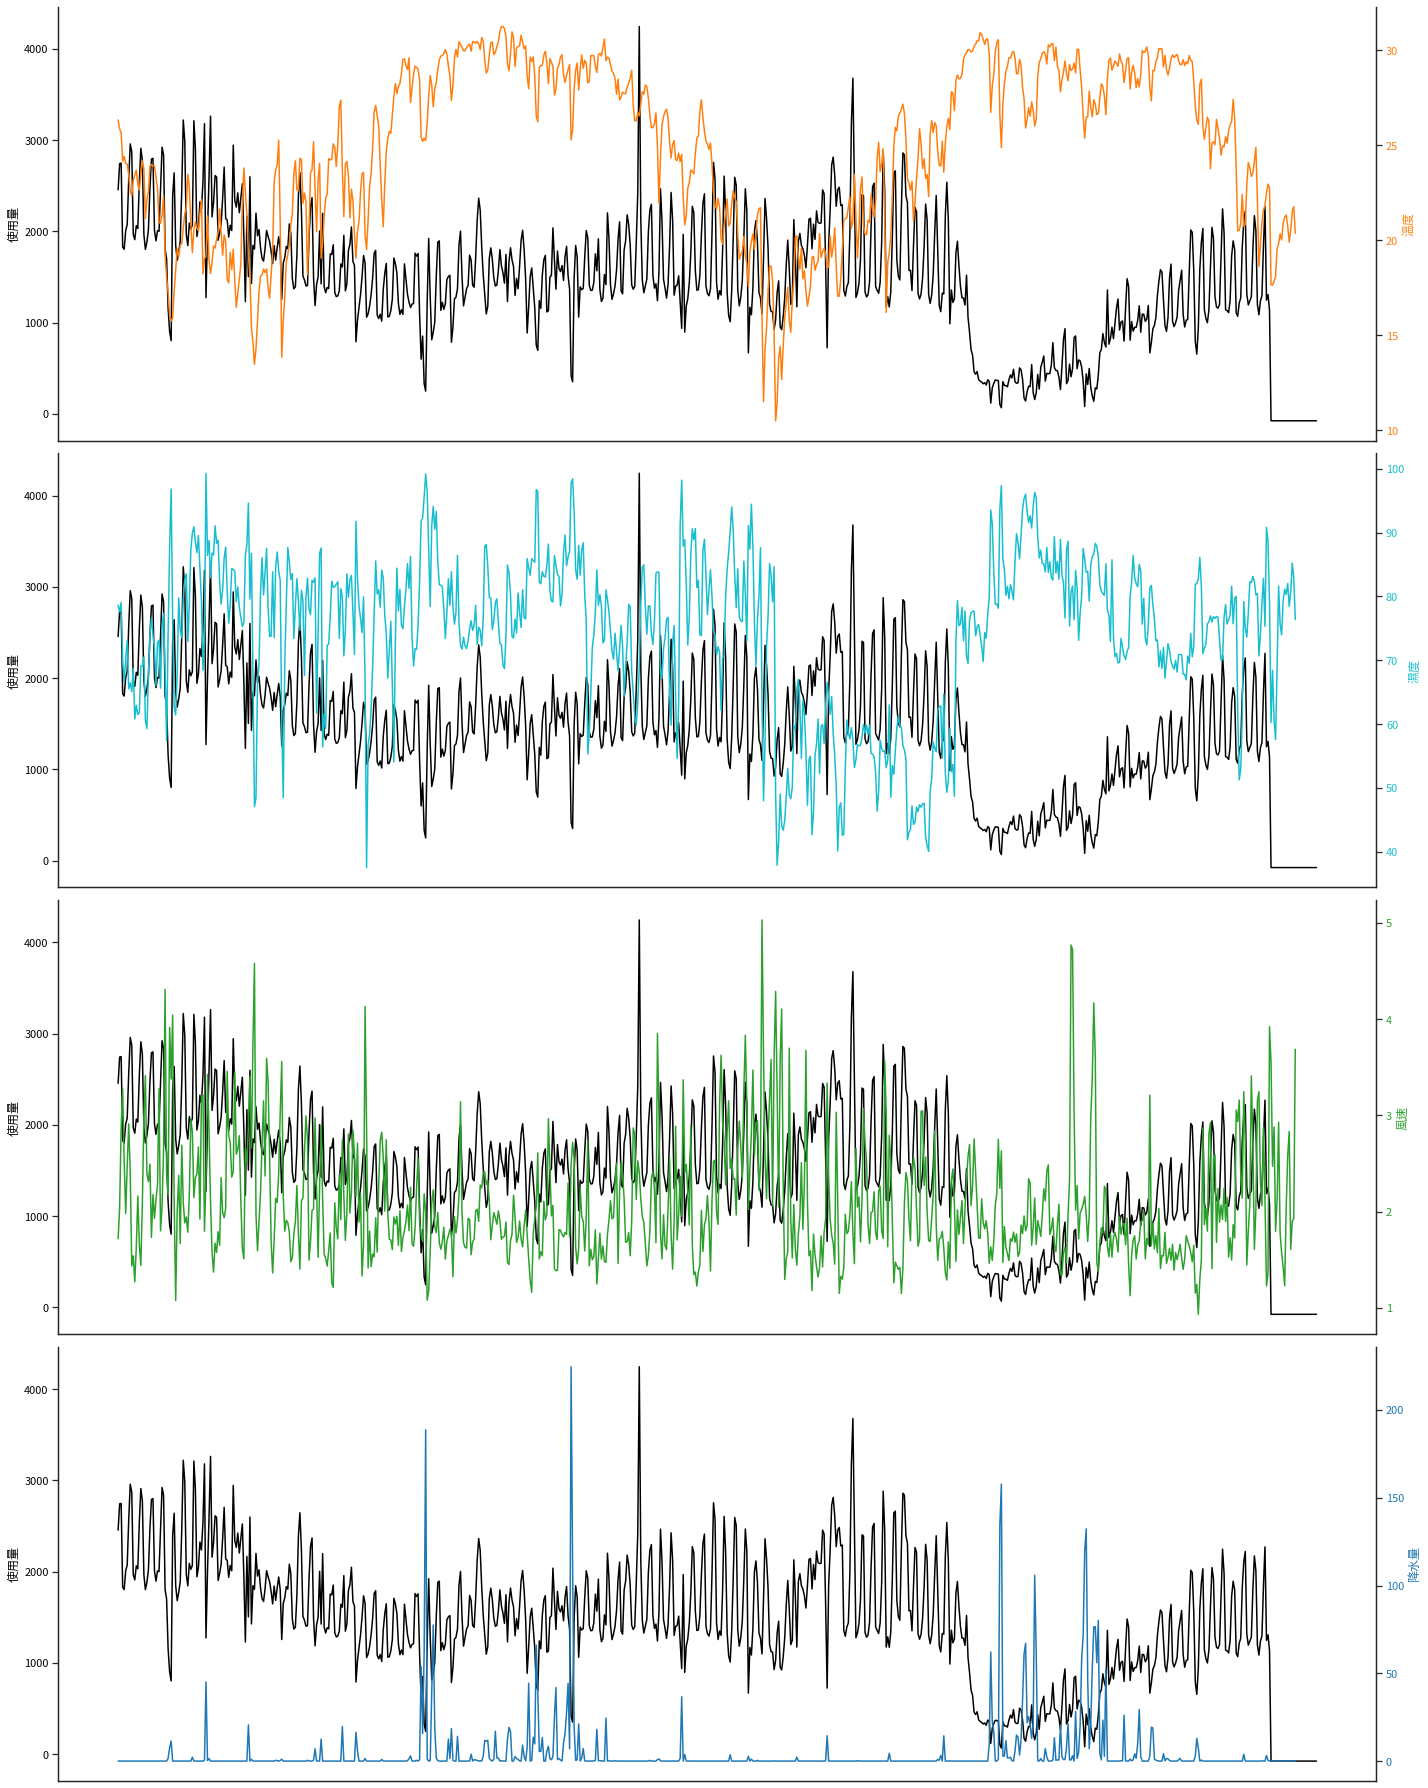

In [72]:
custom_params = {"axes.spines.top": False}
sns.set_theme(font='Noto Sans CJK TC', palette=sns.color_palette(), style="ticks", rc=custom_params)

name = ['溫度', '濕度', '風速', '降水量']

fig, axes = plt.subplots(4, 1, figsize=(20, 25))
for i, item in enumerate(['temp', 'RH', 'WS', 'Precp']):
    ax1 = axes[i]
    color_1 = 'black'
    sns.lineplot(data=data_2, x='yymmdd', y='usage_num', color=color_1, ax=ax1, sort=False)
    ax1.set_ylabel('使用量', color = color_1) 
    ax1.set_xlabel('') 
    ax1.tick_params(axis ='y', labelcolor = color_1) 
    ax1.set_xticklabels('') 
    ax1.tick_params(axis ='x', bottom = False) 
    
    ax2 = ax1.twinx() 
    ax2.set_ylabel(name[i], color = color[i]) 
    ax2.tick_params(axis ='y', labelcolor = color[i]) 
    ax2.tick_params(axis ='x', bottom = False)
    ax2.set_xticklabels('') 
    sns.lineplot(data=data_2, x='yymmdd', y=item, color=color[i], ax=ax2, sort=False)
    
    fig.tight_layout()

# 日預測，無疫情欄位

## 準備資料

In [171]:
data = pd.read_excel("./data/統整資料.xlsx")
data.columns = ["年", "月", "日", "站點名稱", "Address", "站點區域", "觀測站點",
                "平均氣溫", "相對溼度", "平均風速", "平均降雨量", "T-bike使用量", 
                "星期", "是否為工作日", "疫情"
                ]

In [172]:
data.head(3)

,年,月,日,站點名稱,Address,站點區域,觀測站點,平均氣溫,相對溼度,平均風速,平均降雨量,T-bike使用量,星期,是否為工作日,疫情
0,2019,11,1,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.7,77.0,1.6,0.0,81,五,workday,0.0
1,2019,11,2,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.1,74.0,1.9,0.0,89,六,holiday,0.0
2,2019,11,3,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.0,76.0,2.9,0.0,80,日,holiday,0.0


In [59]:
# 移除非必要欄位
data_2 = data.drop(columns=['日', 'Address', '觀測站點', '疫情']).dropna()

# 移除沒有使用量的資料
data_2 = data_2[data_2['T-bike使用量']>=0]

data_2.head(3)

,年,月,站點名稱,站點區域,平均氣溫,相對溼度,平均風速,平均降雨量,T-bike使用量,星期,是否為工作日
0,2019,11,保安轉運站,仁德區,26.7,77.0,1.6,0.0,81,五,workday
1,2019,11,保安轉運站,仁德區,26.1,74.0,1.9,0.0,89,六,holiday
2,2019,11,保安轉運站,仁德區,26.0,76.0,2.9,0.0,80,日,holiday


In [60]:
data_2.shape

(53728, 11)

In [63]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder().fit(data_2['站點區域'].unique())
data_2['站點區域'] = labelencoder.transform(data_2['站點區域'])

labelencoder_2 = LabelEncoder().fit(data_2['站點名稱'].unique())
data_2['站點名稱'] = labelencoder_2.transform(data_2['站點名稱'])

data_2['星期'] = data_2['星期'].replace({'一':1, '二':2, '三':3, '四':4, '五':5, '六':6, '日':7})
data_2['是否為工作日'] = data_2['是否為工作日'].replace({'workday':1, 'holiday':0})

In [64]:
# labelencoder 轉換紀錄
labelencoder.inverse_transform([ 1,  7,  3,  4,  2, 13,  6, 11,  0,  5, 10,  8,  9, 12])

array([ 1,  7,  3,  4,  2, 13,  6, 11,  0,  5, 10,  8,  9, 12])

In [68]:
# labelencoder 轉換紀錄
labelencoder_2.inverse_transform(list(range(1, 74)))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73])

In [66]:
# 隨機取樣資料的 90% 作為訓練集，10% 測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2.drop(columns=['T-bike使用量']), 
                                                    data_2['T-bike使用量'], 
                                                    test_size=0.2, random_state=42)

In [67]:
print(X_train.shape)
print(X_test.shape)

(42982, 10)
(10746, 10)


In [69]:
X_train.head(3)

,年,月,站點名稱,站點區域,平均氣溫,相對溼度,平均風速,平均降雨量,星期,是否為工作日
38695,2021,3,72,12,21.5,81.0,1.4,0.0,4,1
16398,2020,6,14,5,29.3,85.0,1.7,0.0,2,1
51991,2021,9,58,2,29.2,78.0,2.0,12.0,7,0


## 建置模型
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)


### LinearRegression

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("係數: ", [(col, round(coef, 3)) for col, coef in zip(X_train.columns, reg.coef_)])
print("截距項: ", reg.intercept_)

係數:  [('年', -9.1), ('月', -0.238), ('站點名稱', -0.011), ('站點區域', -1.036), ('平均氣溫', -0.348), ('相對溼度', -0.21), ('平均風速', 1.176), ('平均降雨量', -0.098), ('星期', -0.135), ('是否為工作日', -1.219)]
截距項:  18437.676521174293


In [71]:
y_reg_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("RMSE: ", round(mean_squared_error(y_test, y_reg_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_reg_pred), 4))
print("R^2: ", round(r2_score(y_test, y_reg_pred), 4))

RMSE:  29.9524
MAE:  17.7393
R^2:  0.0905


### RandomForest

In [72]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
y_regr_pred = regr.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_regr_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_regr_pred), 4))
print("R^2: ", round(r2_score(y_test, y_regr_pred), 4))

RMSE:  20.9189
MAE:  13.014
R^2:  0.5564


In [73]:
regr.feature_importances_

array([2.24681905e-02, 1.95454872e-03, 5.81552496e-01, 2.98126091e-01,
       6.62874941e-02, 2.14929573e-02, 2.24488915e-03, 5.85325802e-03,
       2.00752603e-05, 0.00000000e+00])

In [74]:
regr.feature_names_in_

array(['年', '月', '站點名稱', '站點區域', '平均氣溫', '相對溼度', '平均風速', '平均降雨量', '星期',
       '是否為工作日'], dtype=object)

### XGBRegressor

In [75]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_pred), 4))
print("R^2: ", round(r2_score(y_test, y_pred), 4))

RMSE:  13.0569
MAE:  7.8835
R^2:  0.8272


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

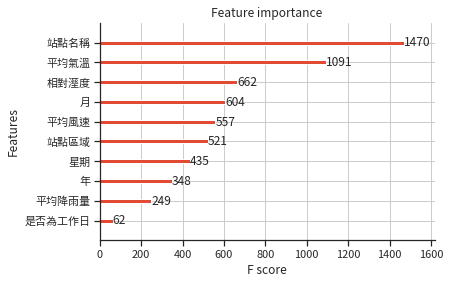

In [76]:
from xgboost import plot_importance
plot_importance(model)

# 日預測，放入疫情欄位

## 準備資料

In [173]:
# 移除非必要欄位
data_2 = data.drop(columns=['日', 'Address', '觀測站點', '站點區域', '疫情']).dropna()
# 移除沒有使用量的資料
data_2 = data_2[data_2['T-bike使用量']>=0]

data_2.head(3)

,年,月,站點名稱,平均氣溫,相對溼度,平均風速,平均降雨量,T-bike使用量,星期,是否為工作日
0,2019,11,保安轉運站,26.7,77.0,1.6,0.0,81,五,workday
1,2019,11,保安轉運站,26.1,74.0,1.9,0.0,89,六,holiday
2,2019,11,保安轉運站,26.0,76.0,2.9,0.0,80,日,holiday


In [174]:
from sklearn.preprocessing import LabelEncoder
labelencoder_2 = LabelEncoder().fit(data_2['站點名稱'].unique())
data_2['站點名稱'] = labelencoder_2.transform(data_2['站點名稱'])

data_2['星期'] = data_2['星期'].replace({'一':1, '二':2, '三':3, '四':4, '五':5, '六':6, '日':7})
data_2['是否為工作日'] = data_2['是否為工作日'].replace({'workday':1, 'holiday':0})

In [175]:
# 隨機取樣資料的 90% 作為訓練集，10% 測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2.drop(columns=['T-bike使用量']), 
                                                    data_2['T-bike使用量'], 
                                                    test_size=0.2, random_state=42)

In [176]:
print(X_train.shape)
print(X_test.shape)

(42982, 9)
(10746, 9)


In [177]:
X_train.head(3)

,年,月,站點名稱,平均氣溫,相對溼度,平均風速,平均降雨量,星期,是否為工作日
38695,2021,3,72,21.5,81.0,1.4,0.0,4,1
16398,2020,6,14,29.3,85.0,1.7,0.0,2,1
51991,2021,9,58,29.2,78.0,2.0,12.0,7,0


## 建置模型
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)


### LinearRegression

In [178]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("係數: ", [(col, round(coef, 3)) for col, coef in zip(X_train.columns, reg.coef_)])
print("截距項: ", reg.intercept_)

係數:  [('年', -9.642), ('月', -0.288), ('站點名稱', -0.019), ('平均氣溫', -0.249), ('相對溼度', -0.24), ('平均風速', 2.253), ('平均降雨量', -0.095), ('星期', -0.139), ('是否為工作日', -1.225)]
截距項:  19526.262593393953


In [179]:
y_reg_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("RMSE: ", round(mean_squared_error(y_test, y_reg_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_reg_pred), 4))
print("R^2: ", round(r2_score(y_test, y_reg_pred), 4))

RMSE:  30.1903
MAE:  17.7592
R^2:  0.076


### RandomForest

In [180]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
y_regr_pred = regr.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_regr_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_regr_pred), 4))
print("R^2: ", round(r2_score(y_test, y_regr_pred), 4))

RMSE:  22.3196
MAE:  14.3225
R^2:  0.495


In [184]:
regr.feature_importances_

array([4.70542690e-02, 1.26491563e-02, 8.41390619e-01, 3.41001608e-02,
       4.47860412e-02, 8.29916269e-03, 1.10912373e-02, 5.96408652e-04,
       3.29446234e-05])

In [185]:
regr.feature_names_in_

array(['年', '月', '站點名稱', '平均氣溫', '相對溼度', '平均風速', '平均降雨量', '星期', '是否為工作日'],
      dtype=object)

<AxesSubplot:>

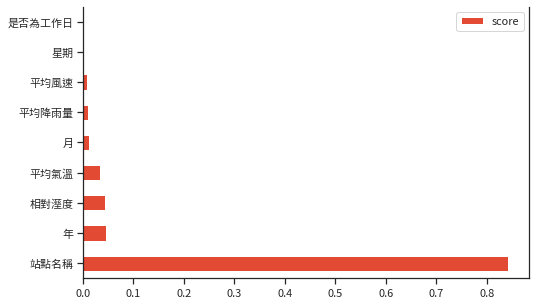

In [190]:
a = sorted([(x, name) for x, name in zip(regr.feature_importances_, regr.feature_names_in_)], reverse=True)
n = len(a)
keys = [name for x, name in a]
values = [x for x, name in a]

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)
data.plot(kind='barh', figsize = (8,5))

### XGBRegressor

In [187]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_pred), 4))
print("R^2: ", round(r2_score(y_test, y_pred), 4))

RMSE:  13.1778
MAE:  8.0856
R^2:  0.8239


<AxesSubplot:>

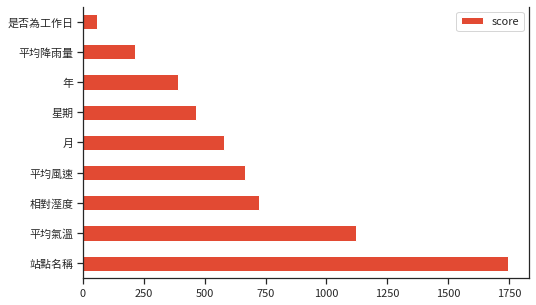

In [191]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)
data.plot(kind='barh', figsize = (8,5)) ## plot top 40 features

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

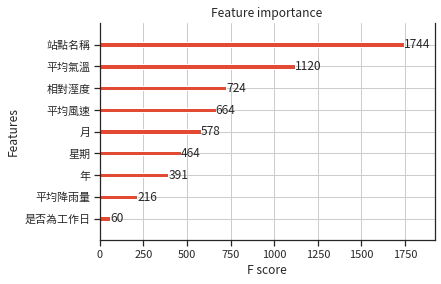

In [189]:
from xgboost import plot_importance
plot_importance(model)

# 日預測，放入疫情、本土病例數欄位

## 準備資料

In [193]:
data = pd.read_excel("./data/統整資料.xlsx")
data.columns = ["年", "月", "日", "站點名稱", "Address", "站點區域", "觀測站點",
                "平均氣溫", "相對溼度", "平均風速", "平均降雨量", "T-bike使用量", 
                "星期", "是否為工作日", "疫情"
                ]

In [194]:
covid_data = pd.read_excel("./data/嚴重特殊傳染性肺炎-依個案研判日統計.xlsx")
covid_data['local'] = [covid_data['確定病例數'][i] if covid_data['是否為境外移入'][i]=='是' else 0 for i in range(covid_data.shape[0])]
covid_data[['year', 'month', 'day']] = covid_data['個案研判日'].astype(str).str.split('-', expand=True)
covid_data = covid_data.groupby(by=['year', 'month', 'day']).sum().reset_index().astype(int)
covid_data.columns = ["年", "月", "日", "確定病例數", "境外移入病例數"]

In [195]:
data.head(3)

,年,月,日,站點名稱,Address,站點區域,觀測站點,平均氣溫,相對溼度,平均風速,平均降雨量,T-bike使用量,星期,是否為工作日,疫情
0,2019,11,1,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.7,77.0,1.6,0.0,81,五,workday,0.0
1,2019,11,2,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.1,74.0,1.9,0.0,89,六,holiday,0.0
2,2019,11,3,保安轉運站,保安轉運站公車侯車亭旁 (文賢路一段),仁德區,仁德,26.0,76.0,2.9,0.0,80,日,holiday,0.0


In [196]:
# 移除沒有使用量的資料
data_2 = data[data['T-bike使用量']>=0].reset_index(drop=True)

covid_num, covid_num_abroad = [], []
for i in range(data_2.shape[0]):
    df = covid_data[(covid_data['年']==data_2['年'][i]) & (covid_data['月']==data_2['月'][i]) & (covid_data['日']==data_2['日'][i])]
    if df.shape[0]>0:
        covid_num_abroad.append(int(df['境外移入病例數']))
        covid_num.append(int(df['確定病例數']))
    else:
        covid_num_abroad.append(0)
        covid_num.append(0)

# 新增病例數欄位
data_2['境外移入病例數'] = covid_num_abroad
data_2['確定病例數'] = covid_num
# 移除非必要欄位
data_2 = data_2.drop(columns=['日', 'Address', '觀測站點', '站點區域']).dropna()

In [198]:
data_2.head(3)

,年,月,站點名稱,平均氣溫,相對溼度,平均風速,平均降雨量,T-bike使用量,星期,是否為工作日,疫情,境外移入病例數,確定病例數
0,2019,11,保安轉運站,26.7,77.0,1.6,0.0,81,五,workday,0.0,0,0
1,2019,11,保安轉運站,26.1,74.0,1.9,0.0,89,六,holiday,0.0,0,0
2,2019,11,保安轉運站,26.0,76.0,2.9,0.0,80,日,holiday,0.0,0,0


In [199]:
from sklearn.preprocessing import LabelEncoder
labelencoder_2 = LabelEncoder().fit(data_2['站點名稱'].unique())
data_2['站點名稱'] = labelencoder_2.transform(data_2['站點名稱'])

data_2['星期'] = data_2['星期'].replace({'一':1, '二':2, '三':3, '四':4, '五':5, '六':6, '日':7})
data_2['是否為工作日'] = data_2['是否為工作日'].replace({'workday':1, 'holiday':0})

In [200]:
# 隨機取樣資料的 90% 作為訓練集，10% 測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2.drop(columns=['T-bike使用量']), 
                                                    data_2['T-bike使用量'], 
                                                    test_size=0.2, random_state=42)

In [201]:
print(X_train.shape)
print(X_test.shape)

(42982, 12)
(10746, 12)


In [202]:
X_train.head(3)

,年,月,站點名稱,平均氣溫,相對溼度,平均風速,平均降雨量,星期,是否為工作日,疫情,境外移入病例數,確定病例數
35565,2021,3,72,21.5,81.0,1.4,0.0,4,1,1.5,1,1
13906,2020,6,14,29.3,85.0,1.7,0.0,2,1,1.5,0,0
48770,2021,9,58,29.2,78.0,2.0,12.0,7,0,2.0,4,6


## 建置模型
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)


### LinearRegression

In [203]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("係數: ", [(col, round(coef, 3)) for col, coef in zip(X_train.columns, reg.coef_)])
print("截距項: ", reg.intercept_)

係數:  [('年', -0.216), ('月', -0.006), ('站點名稱', -0.02), ('平均氣溫', 0.127), ('相對溼度', -0.211), ('平均風速', 2.899), ('平均降雨量', -0.075), ('星期', -0.088), ('是否為工作日', -0.928), ('疫情', -9.128), ('境外移入病例數', 0.022), ('確定病例數', -0.001)]
截距項:  479.9576868284713


In [204]:
y_reg_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("RMSE: ", round(mean_squared_error(y_test, y_reg_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_reg_pred), 4))
print("R^2: ", round(r2_score(y_test, y_reg_pred), 4))

RMSE:  29.9759
MAE:  17.5264
R^2:  0.089


### RandomForest

In [205]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
y_regr_pred = regr.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_regr_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_regr_pred), 4))
print("R^2: ", round(r2_score(y_test, y_regr_pred), 4))

RMSE:  21.7908
MAE:  14.2258
R^2:  0.5186


In [206]:
regr.feature_importances_

array([2.83423496e-04, 1.94524737e-02, 7.85260307e-01, 4.32047097e-03,
       3.80969509e-02, 6.73189431e-03, 2.24278927e-03, 7.51775606e-04,
       1.27813318e-04, 1.41757804e-01, 3.16423056e-04, 6.57874745e-04])

In [207]:
regr.feature_names_in_

array(['年', '月', '站點名稱', '平均氣溫', '相對溼度', '平均風速', '平均降雨量', '星期', '是否為工作日',
       '疫情', '境外移入病例數', '確定病例數'], dtype=object)

<AxesSubplot:>

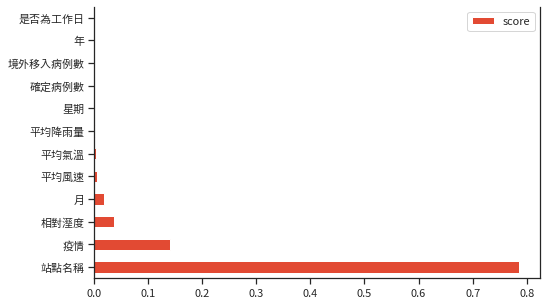

In [208]:
a = sorted([(x, name) for x, name in zip(regr.feature_importances_, regr.feature_names_in_)], reverse=True)
n = len(a)
keys = [name for x, name in a]
values = [x for x, name in a]

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)
data.plot(kind='barh', figsize = (8,5))

### XGBRegressor

In [209]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_pred), 4))
print("R^2: ", round(r2_score(y_test, y_pred), 4))

RMSE:  12.9468
MAE:  7.8834
R^2:  0.8301


<AxesSubplot:>

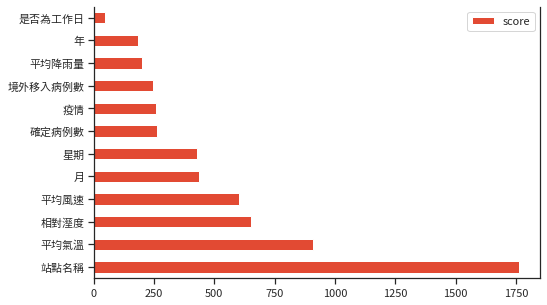

In [210]:
feature_important = model.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by="score", ascending=False)
data.plot(kind='barh', figsize = (8,5)) ## plot top 40 features

# 日預測，放入疫情、病例數(包括境外)欄位

## 準備資料

In [119]:
covid_data = pd.read_excel("./data/嚴重特殊傳染性肺炎-依個案研判日統計.xlsx")
covid_data[['year', 'month', 'day']] = covid_data['個案研判日'].astype(str).str.split('-', expand=True)
covid_data = covid_data.groupby(by=['year', 'month', 'day']).sum().reset_index().astype(int)
covid_data.columns = ["年", "月", "日", "確定病例數"]

In [120]:
covid_data.head(3)

,年,月,日,確定病例數
0,2020,1,22,1
1,2020,1,24,2
2,2020,1,26,1


In [122]:
# 移除沒有使用量的資料
data_2 = data[data['T-bike使用量']>=0].reset_index(drop=True)

covid_num = []
for i in range(data_2.shape[0]):
    df = covid_data[(covid_data['年']==data_2['年'][i]) & (covid_data['月']==data_2['月'][i]) & (covid_data['日']==data_2['日'][i])]
    if df.shape[0]>0:
        covid_num.append(int(df['確定病例數']))
    else:
        covid_num.append(0)

# 新增病例數欄位
data_2['確定病例數'] = covid_num
# 移除非必要欄位
data_2 = data_2.drop(columns=['日', 'Address', '觀測站點']).dropna()

In [123]:
data_2.head(3)

,年,月,站點名稱,站點區域,平均氣溫,相對溼度,平均風速,平均降雨量,T-bike使用量,星期,是否為工作日,疫情,確定病例數
0,2019,11,保安轉運站,仁德區,26.7,77.0,1.6,0.0,81,五,workday,0.0,0
1,2019,11,保安轉運站,仁德區,26.1,74.0,1.9,0.0,89,六,holiday,0.0,0
2,2019,11,保安轉運站,仁德區,26.0,76.0,2.9,0.0,80,日,holiday,0.0,0


In [124]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder().fit(data_2['站點區域'].unique())
data_2['站點區域'] = labelencoder.transform(data_2['站點區域'])

labelencoder_2 = LabelEncoder().fit(data_2['站點名稱'].unique())
data_2['站點名稱'] = labelencoder_2.transform(data_2['站點名稱'])

data_2['星期'] = data_2['星期'].replace({'一':1, '二':2, '三':3, '四':4, '五':5, '六':6, '日':7})
data_2['是否為工作日'] = data_2['是否為工作日'].replace({'workday':1, 'holiday':0})

In [125]:
# 隨機取樣資料的 90% 作為訓練集，10% 測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2.drop(columns=['T-bike使用量']), 
                                                    data_2['T-bike使用量'], 
                                                    test_size=0.2, random_state=42)

In [126]:
print(X_train.shape)
print(X_test.shape)

(42982, 12)
(10746, 12)


In [127]:
X_train.head(3)

,年,月,站點名稱,站點區域,平均氣溫,相對溼度,平均風速,平均降雨量,星期,是否為工作日,疫情,確定病例數
35565,2021,3,72,12,21.5,81.0,1.4,0.0,4,1,1.5,1
13906,2020,6,14,5,29.3,85.0,1.7,0.0,2,1,1.5,0
48770,2021,9,58,2,29.2,78.0,2.0,12.0,7,0,2.0,6


## 建置模型
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)


### LinearRegression

In [128]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("係數: ", [(col, round(coef, 3)) for col, coef in zip(X_train.columns, reg.coef_)])
print("截距項: ", reg.intercept_)

係數:  [('年', 0.182), ('月', 0.042), ('站點名稱', -0.012), ('站點區域', -1.024), ('平均氣溫', 0.021), ('相對溼度', -0.182), ('平均風速', 1.823), ('平均降雨量', -0.079), ('星期', -0.085), ('是否為工作日', -0.927), ('疫情', -8.936), ('確定病例數', -0.002)]
截距項:  -317.18192057535424


In [129]:
y_reg_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("RMSE: ", round(mean_squared_error(y_test, y_reg_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_reg_pred), 4))
print("R^2: ", round(r2_score(y_test, y_reg_pred), 4))

RMSE:  29.7352
MAE:  17.5347
R^2:  0.1036


### RandomForest

In [130]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
y_regr_pred = regr.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_regr_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_regr_pred), 4))
print("R^2: ", round(r2_score(y_test, y_regr_pred), 4))

RMSE:  20.1663
MAE:  12.7436
R^2:  0.5877


In [131]:
regr.feature_importances_

array([5.86043492e-05, 1.30491712e-02, 5.57018461e-01, 2.87341422e-01,
       2.44306834e-04, 2.03194866e-02, 1.29181912e-03, 3.55048791e-04,
       8.01434847e-06, 0.00000000e+00, 1.19911647e-01, 4.02019360e-04])

In [132]:
regr.feature_names_in_

array(['年', '月', '站點名稱', '站點區域', '平均氣溫', '相對溼度', '平均風速', '平均降雨量', '星期',
       '是否為工作日', '疫情', '確定病例數'], dtype=object)

### XGBRegressor

In [133]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_pred), 4))
print("R^2: ", round(r2_score(y_test, y_pred), 4))

RMSE:  12.8082
MAE:  7.7743
R^2:  0.8337


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

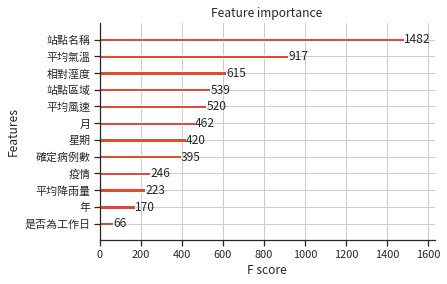

In [134]:
from xgboost import plot_importance
plot_importance(model)

# 站點日預測，放入疫情欄位 (後來沒用到)

## 準備資料

In [135]:
# 移除非必要欄位
data_2 = data.drop(columns=['day', 'Address', '觀測站點', '站點區域']).dropna()
# 移除沒有使用量的資料
data_2 = data_2[data_2['usage_num']>=0]
# 選定站點 -- 最高使用量的【臺南火車站前站】
data_2 = data_2[data_2['StationName']=='臺南火車站前站'].drop(columns=['StationName'])

data_2.head(3)

,year,month,temp,RH,WS,Precp,usage_num,week,workday,疫情
1590,2019,11,26.3,75.0,2.1,0.0,385,六,holiday,0.0
1591,2019,11,25.9,77.0,2.4,0.0,331,日,holiday,0.0
1592,2019,11,25.7,79.0,3.2,0.0,284,一,workday,0.0


In [136]:
data_2['week'] = data_2['week'].replace({'一':1, '二':2, '三':3, '四':4, '五':5, '六':6, '日':7})
data_2['workday'] = data_2['workday'].replace({'workday':1, 'holiday':0})

In [143]:
# 隨機取樣資料的 90% 作為訓練集，10% 測試集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_2.drop(columns=['usage_num']), 
                                                    data_2['usage_num'], 
                                                    test_size=0.2, random_state=42)

In [144]:
print(X_train.shape)
print(X_test.shape)

(608, 9)
(153, 9)


In [145]:
X_train.head(3)

,year,month,temp,RH,WS,Precp,week,workday,疫情
26794,2020,10,26.8,67.0,2.0,0.0,3,1,1.0
19891,2020,7,31.4,68.0,2.0,0.0,2,1,1.0
6247,2020,1,13.6,39.0,4.7,0.0,1,1,0.5


In [146]:
y_train

26794    146
19891    279
6247     270
29043    153
42697      6
        ... 
6228     310
8451     262
19895    125
33676    171
8447     222
Name: usage_num, Length: 608, dtype: int64

## 建置模型
- [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression)
- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)


### LinearRegression

In [150]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print("係數: ", [(col, round(coef, 3)) for col, coef in zip(X_train.columns, reg.coef_)])
print("截距項: ", reg.intercept_)

係數:  [('year', 7.922), ('month', 2.19), ('temp', -3.001), ('RH', -0.439), ('WS', -12.048), ('Precp', -0.793), ('week', 3.912), ('workday', 7.767), ('疫情', -84.661)]
截距項:  -15610.052322312766


In [151]:
y_reg_pred = reg.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("RMSE: ", round(mean_squared_error(y_test, y_reg_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_reg_pred), 4))
print("R^2: ", round(r2_score(y_test, y_reg_pred), 4))

RMSE:  55.8603
MAE:  44.7195
R^2:  0.6141


### RandomForest

In [152]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=5, random_state=0).fit(X_train, y_train)
y_regr_pred = regr.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_regr_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_regr_pred), 4))
print("R^2: ", round(r2_score(y_test, y_regr_pred), 4))

RMSE:  49.4915
MAE:  39.7539
R^2:  0.6971


### XGBRegressor

In [153]:
from xgboost import XGBRegressor
model = XGBRegressor().fit(X_train, y_train)
y_pred = model.predict(X_test)

print("RMSE: ", round(mean_squared_error(y_test, y_pred)**0.5, 4))
print("MAE: ", round(mean_absolute_error(y_test, y_pred), 4))
print("R^2: ", round(r2_score(y_test, y_pred), 4))

RMSE:  49.8563
MAE:  38.7057
R^2:  0.6926
